<a href="https://colab.research.google.com/github/veyselalevcan/Time_Series/blob/main/ARIMA_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install evds --upgrade

In [ ]:
import pandas as pd
import evds as ev
import matplotlib.pyplot as plt


In [ ]:
evds=ev.evdsAPI('J2ua6jVeIF')

In [ ]:
veri=evds.get_data(['TP.MK.LON.YTL'], startdate='01-01-2000', enddate='01-01-2024')
veri

,Tarih,TP_MK_LON_YTL
0,2000-1,284.30
1,2000-2,300.70
2,2000-3,285.30
3,2000-4,279.40
4,2000-5,275.90
...,...,...
281,2023-6,1953.50
282,2023-7,1947.71
283,2023-8,1916.86
284,2023-9,1918.78


In [ ]:
tarih=pd.date_range('01-01-2000', periods=len(veri['Tarih']), freq='M')
veri['Tarih']=tarih
veri

,Tarih,TP_MK_LON_YTL
0,2000-01-31,284.30
1,2000-02-29,300.70
2,2000-03-31,285.30
3,2000-04-30,279.40
4,2000-05-31,275.90
...,...,...
281,2023-06-30,1953.50
282,2023-07-31,1947.71
283,2023-08-31,1916.86
284,2023-09-30,1918.78


In [ ]:
veri.set_index('Tarih', inplace=True)
veri

,TP_MK_LON_YTL
Tarih,
2000-01-31,284.30
2000-02-29,300.70
2000-03-31,285.30
2000-04-30,279.40
2000-05-31,275.90
...,...
2023-06-30,1953.50
2023-07-31,1947.71
2023-08-31,1916.86


In [ ]:
veri.rename(columns={'TP_MK_LON_YTL':'Golden Price'}, inplace=True)
veri

,Golden Price
Tarih,
2000-01-31,284.30
2000-02-29,300.70
2000-03-31,285.30
2000-04-30,279.40
2000-05-31,275.90
...,...
2023-06-30,1953.50
2023-07-31,1947.71
2023-08-31,1916.86


In [ ]:
veri.isnull().sum()

Golden Price    0
dtype: int64

#Son bir yıllık gözlem degerini daha sonra kullanmak icin ayırıyorum.

In [ ]:
veri2=veri.iloc[:-12]
sonyıl=veri.iloc[-12:]
print(veri2,sonyıl)

            Golden Price
Tarih                   
2000-01-31        284.30
2000-02-29        300.70
2000-03-31        285.30
2000-04-30        279.40
2000-05-31        275.90
...                  ...
2022-06-30       1837.12
2022-07-31       1745.34
2022-08-31       1766.83
2022-09-30       1681.17
2022-10-31       1659.18

[274 rows x 1 columns]             Golden Price
Tarih                   
2022-11-30       1728.53
2022-12-31       1793.53
2023-01-31       1901.82
2023-02-28       1844.98
2023-03-31       1927.60
2023-04-30       1994.37
2023-05-31       1982.26
2023-06-30       1953.50
2023-07-31       1947.71
2023-08-31       1916.86
2023-09-30       1918.78
2023-10-31       1925.05


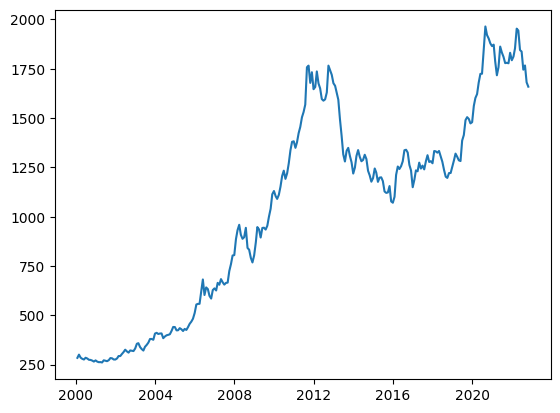

In [ ]:
plt.plot(veri2)

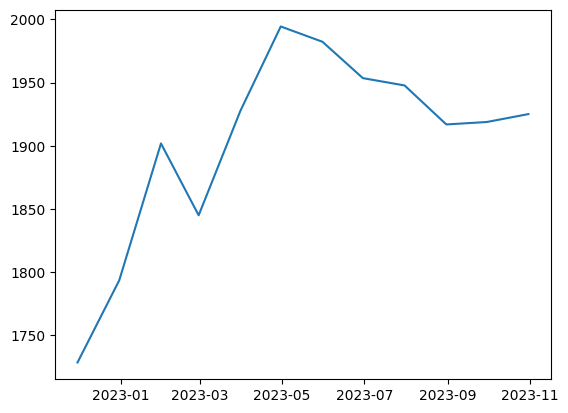

In [ ]:
plt.plot(sonyıl)

#Duraganlık ve Mevsimsellik kontrolu


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

## Oto korelasyon grafiğinde mevsimsellik kontrolu


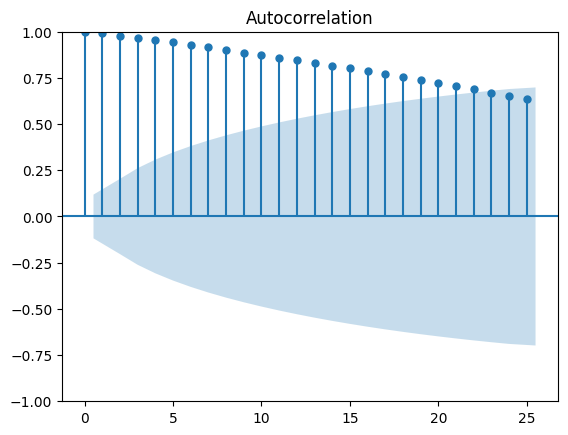

In [ ]:
acf=plot_acf(veri2)

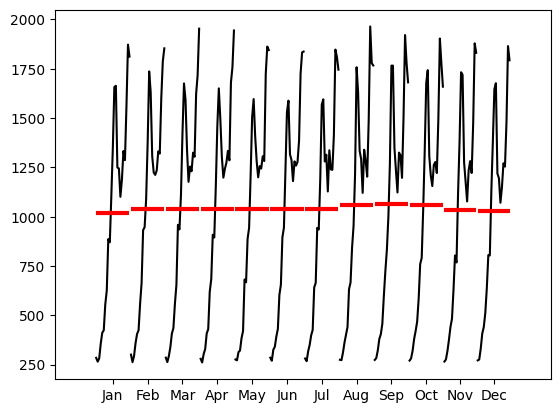

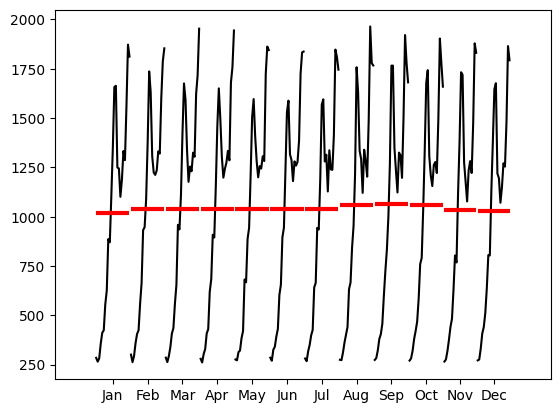

In [ ]:
month_plot(veri2)

## İstatiksel olarak mevsimsellik testi

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
from arch.unitroot import ADF, KPSS

In [ ]:
adf=ADF(veri2)
kpss=KPSS(veri2)
adf,kpss #adf p degeri 0.05 ten buyuk oldugu icin ho reddedilemez,
         #kpss testine gore h0 reddedilir. serimiz duragan degil

(<class 'arch.unitroot.unitroot.ADF'>
 """
    Augmented Dickey-Fuller Results   
 Test Statistic                 -1.016
 P-value                         0.747
 Lags                                1
 -------------------------------------
 
 Trend: Constant
 Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
 Null Hypothesis: The process contains a unit root.
 Alternative Hypothesis: The process is weakly stationary.
 """,
 <class 'arch.unitroot.unitroot.KPSS'>
 """
     KPSS Stationarity Test Results   
 Test Statistic                  2.162
 P-value                         0.000
 Lags                               10
 -------------------------------------
 
 Trend: Constant
 Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
 Null Hypothesis: The process is weakly stationary.
 Alternative Hypothesis: The process contains a unit root.
 """)

###Fark denklemi alarak duraganlastırma


In [ ]:
verifark=veri2.diff().dropna()
adf=ADF(verifark)
kpss=KPSS(verifark)
adf,kpss # surec duragandır

(<class 'arch.unitroot.unitroot.ADF'>
 """
    Augmented Dickey-Fuller Results   
 Test Statistic                -13.191
 P-value                         0.000
 Lags                                0
 -------------------------------------
 
 Trend: Constant
 Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
 Null Hypothesis: The process contains a unit root.
 Alternative Hypothesis: The process is weakly stationary.
 """,
 <class 'arch.unitroot.unitroot.KPSS'>
 """
     KPSS Stationarity Test Results   
 Test Statistic                  0.106
 P-value                         0.556
 Lags                                1
 -------------------------------------
 
 Trend: Constant
 Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
 Null Hypothesis: The process is weakly stationary.
 Alternative Hypothesis: The process contains a unit root.
 """)

## ARIMA modelinde d parametresinin 1 oldugunu bulduk. p ve q yu bulalım


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
model=auto_arima(veri2, trace=True, seasonal=False)
model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2796.810, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2807.246, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2796.324, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2795.485, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2809.321, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2797.484, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2797.484, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2799.473, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2796.333, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.768 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
model=auto_arima(veri2, trace=True, seasonal=False, information_criterion='bic') #bayesian uzerinden deneyelim
model

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=2818.467, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=2814.465, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=2807.152, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=2806.313, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=2812.930, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=2811.922, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=2811.922, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=2817.520, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=2803.552, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=2809.135, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=2809.133, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=2804.135, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=2814.739, Time=0.49 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.816 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model=auto_arima(veri2, trace=True, seasonal=False)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2796.810, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2807.246, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2796.324, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2795.485, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2809.321, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2797.484, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2797.484, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2799.473, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2796.333, Time=0.18 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.563 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  274
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1394.742
Date:                Wed, 22 Nov 2023   AIC                           2795.485
Time:                        21:49:17   BIC                           2806.313
Sample:                    01-31-2000   HQIC                          2799.831
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.0469      3.064      1.647      0.100      -0.959      11.053
ma.L1          0.2274      0.054      4.193      0.000       0.121       0.334
sigma2      1603.2361     99.137     16.172      0.000    1408.932    1797.540
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.71
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.64   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
import numpy as np

In [ ]:
hata=model.resid()
hata

Tarih
2000-01-31    279.253096
2000-02-29     11.251456
2000-03-31    -22.879922
2000-04-30     -5.757077
2000-05-31     -7.237889
                 ...    
2022-06-30      8.963069
2022-07-31    -98.865149
2022-08-31     38.925502
2022-09-30    -99.558749
2022-10-31     -4.396770
Length: 274, dtype: float64

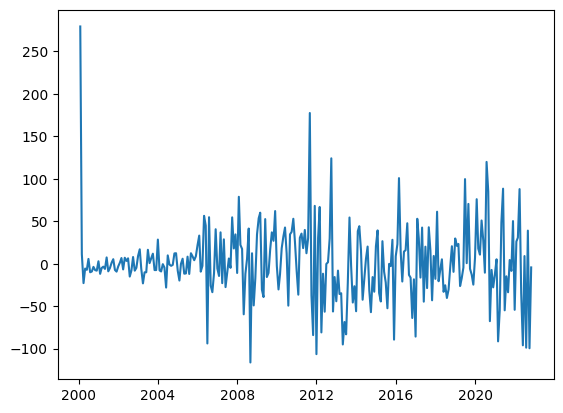

In [ ]:
plt.plot(hata) #white noise kontrolu yapıyoruz, istatiksel olarak kontrol etmemiz gerekir

In [ ]:
ACF= sm.tsa.stattools.acf(hata, qstat=True, nlags=10)
otokor= {
    'Gecikme': range(1,11),
    'ACF': np.round(ACF[0][1:], 3),#ACF kacıncı indeksten deger almamız gerektigini kontrol et
    'Prob': np.round(ACF[2],3)}
df=pd.DataFrame(otokor)
df                      #Prob degerlerinin hepsi 0.05ten buyuk, white noise vardır

,Gecikme,ACF,Prob
0,1,0.006,0.915
1,2,-0.018,0.952
2,3,-0.027,0.959
3,4,-0.019,0.982
4,5,0.093,0.724
5,6,0.055,0.718
6,7,-0.038,0.767
7,8,-0.116,0.443
8,9,-0.009,0.541
9,10,0.028,0.613


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
c= acorr_ljungbox(hata) #aynı sonucları baska yoldan alabiliriz
c

,lb_stat,lb_pvalue
1,0.011304,0.915328
2,0.097818,0.952268
3,0.303631,0.959344
4,0.404390,0.982116
5,2.843666,0.724073
6,3.697086,0.717590
7,4.108746,0.767170
8,7.904526,0.442852
9,7.928168,0.541401
10,8.159405,0.613270


#Model uzerinden tahmin yapma


In [ ]:
gelecek,guven_aralık= model.predict(12,return_conf_int=True) #12 donemlik tahmin
gelecek, guven_aralık #alt ve ust sınır degerler verir

(2022-11-30    1663.227058
 2022-12-31    1668.273962
 2023-01-31    1673.320866
 2023-02-28    1678.367770
 2023-03-31    1683.414674
 2023-04-30    1688.461578
 2023-05-31    1693.508482
 2023-06-30    1698.555386
 2023-07-31    1703.602290
 2023-08-31    1708.649194
 2023-09-30    1713.696099
 2023-10-31    1718.743003
 Freq: M, dtype: float64,
 array([[1584.74925613, 1741.7048591 ],
        [1544.02790096, 1792.52002247],
        [1516.10953701, 1830.53219461],
        [1493.99391007, 1862.74162975],
        [1475.39535164, 1891.43399638],
        [1459.22293222, 1917.70022399],
        [1444.854757  , 1942.16220741],
        [1431.89644056, 1965.21433205],
        [1420.07925495, 1987.12532586],
        [1409.21033609, 2008.0880529 ],
        [1399.14570802, 2028.24648917],
        [1389.77451408, 2047.71149131]]))

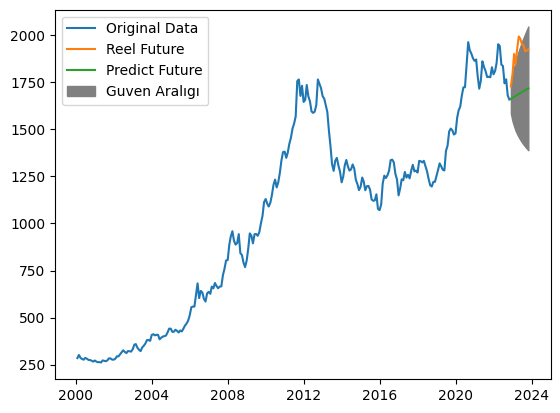

In [ ]:
plt.plot(veri2, label='Original Data')
plt.plot(sonyıl, label='Reel Future')
plt.plot(gelecek, label= 'Predict Future')
plt.fill_between(gelecek.index, guven_aralık[:,0], guven_aralık[:,1], color='gray', label='Guven Aralıgı')
plt.legend()